<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Agrupamento 
Caderno de **Aula**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agrupamento;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Aulas**

## 0\. Abordagens estatísticas

*   **Descritiva**: foco no passado para entender o **presente**.
*   <font color='red'>**Preditiva**</font>: foca no passado para inferir o **futuro**.

## 1\. Agrupamento

### **1.1. Motivação** 

> Um shopping quer **segmentar** seus clientes para melhorar o direcionamento de ações de marketing. Qual é a melhor forma de **agrupá-los**?

Queremos encontrar um **conjunto de perfis médios** e alocar os clientes ao perfil mais **próximo**:

```python
import numpy as np

# -- métrica de distancia

def dist(a: np.array, b: np.array) -> float:
  return np.linalg.norm(a - b)

# -- perfis médios (idade, renda anual em milhares)

grupo_a = np.array([30, 40])
grupo_b = np.array([57, 90])

# -- cliente e sua distancia dos perfis

cliente = np.array([27, 50])

dist_a = dist(cliente, grupo_a) # 10.44
dist_b = dist(cliente, grupo_b) # 50.00
```

> Qual a **quantidade** de grupos?

> Qual são as **características** de cada grupos?

> Como calcular a **distância** entre o grupo e os clientes?

### **1.2. K-médias** 

O agrupamento de k-médias é uma abordagem que busca particionar um conjunto de dados em $k$ grupos ou **clusters**. Cada objeto $x$ do conjunto de dados é alocado ao grupo mais próximo, ou seja, ao grupo com a menor distância entre suas coordenadas e as do centro do grupo $x_c$ (**centróide**). De maneira geral, utiliza **métodos iterativos** para encontrar os centróides $x_c$, dado um número **pré definido** de clusters.

O algoritmo parte de algumas definições:

> defina a quantidade de clusters $k$;

> defina a posição inicial dos centróides $x_c$;

> defina a um erro de movimentação de centróide $\alpha$;


E itera até que os centróides não se movimentem significativamente:

> para cada valor $x_i$:

>> para cada valor $x_c$:

>>> calcule a distância de $x_i$ a $x_c$ 

>> aloque $x_i$ para $x_c$ mais próximo

> recalcule todos $x_c$

> se a distancia entre o antigo e o novo $x_c$ for maior que $\alpha$:

>> repita

### **1.3. Pacote Scikit-Learn** 

Pacote Python para ciência de dados e *machine learning*. A documentação pode ser encontrada neste [link](https://scikit-learn.org/stable/). Possuí diversos modelos para aprendizado supervisionado, não supervisionado, etc. além de métodos auxiliares. Para o agrupamento de k-médias, temos:

In [1]:
from sklearn.cluster import KMeans

In [2]:
model = KMeans()

## 2\. Dados

### **2.1. Pré-processamento** 

Neste módulo, vamos utilizar dados sobre a idade, renda e potencial de compra de clientes de um shopping. O conjunto de dados está neste [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/mall_customers.csv) e foi inspirado no conjunto de dados do Kaggle, presente neste [link](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python). 

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/mall_customers.csv" -O mall_customers.csv 

Vamos conhecer um pouco melhor o conjunto de dados.

In [5]:
mall = pd.read_csv('./mall_customers.csv', sep=',')

In [6]:
mall.head()

,id,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      200 non-null    int64 
 1   gender  200 non-null    object
 2   age     200 non-null    int64 
 3   income  200 non-null    int64 
 4   score   200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


O **pairplot** é um método do pacote Python Seaborn que gera visualizações para cada par de colunas do conjunto de dados.

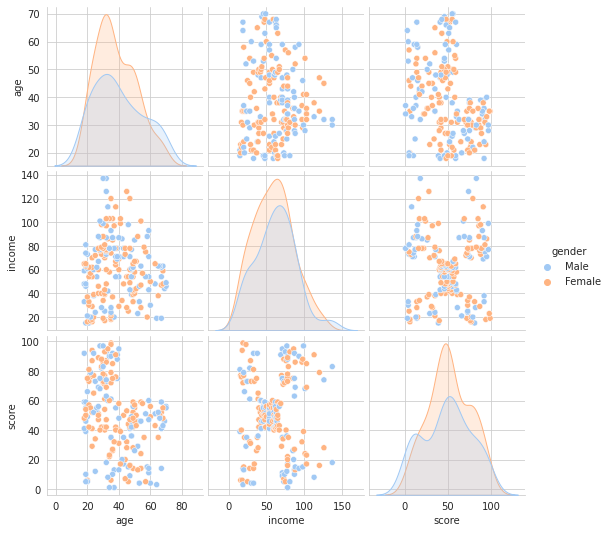

In [8]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=mall.drop("id", axis=1), hue="gender", palette="pastel")

Nota-se que o perfil de compras de clientes de sexo diferentes parece ser o mesmo, não contribuindo assim para a segregação da base. Vamos então selecionar os atributos que de fato podem ajudar na segregação dos cliente: idade, renda e a pontuação de compra.

> Note que a dimensão dos atributos numéricos é a mesma, logo, não é necessário fazer a **escala** dos seus valores através de técnicas de padronização ou normalização.

In [9]:
data = mall[["age",	"income",	"score"]]

In [10]:
data.head()

,age,income,score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


### **2.2. Treino / Teste** 

Como o agrupamento por k-médias é uma técnica não supervisionada, não temos uma definição do certo ou real. Portanto, a ausência da etapa de validação da predição faz com que não exista a necessidade de dividir o conjunto de dados em treino e teste para treinar e validar o modelo.

## 3\. Treino

O treino de modelos de aprendizagem não supervisionada consiste na etapa de calculo dos parametros do modelo baseado numa condição de parada. No caso da agrupamento por **k-médias**, estamo interessados em definir os **centróides** $x_c$ de um número de **clusters** $k$ pré-selecionados a partir de uma métrica de **distância** $d$. Objetos são alocados ao cluster do centróide mais **próximo**.

### **3.1. Algoritmo** 

O treino de um modelo de k-médias é feito através do algoritmo de **Lloyd** por padrão (explicação neste [link](https://en.wikipedia.org/wiki/Lloyd%27s_algorithm)). A explicação completa do algoritmo foge do escopo desse curso mas o raciocínio por trás é semelhante ao apresentado na aula 1 deste módulo: um processo iterativo que busca posicionar **centróides** de um número pré-definido de **clusters** através de uma métrica de **distância** e um **critério de parada**. Essencialmente busca a minimização do critério da "soma dos quadrados dentro do cluster" (**WCSS**). 

> A partição do espaço é conhecida como diagrama de **Voronoi** ([link](https://en.wikipedia.org/wiki/Voronoi_diagram)). 

A métrica de distância mais comum é a euclidiana:

> $d = f(a,b) = \sqrt{\sum_{i=1}^{n} (a_i-b_i)^{2}}$

In [11]:
model = KMeans(n_clusters=5)
model = model.fit(data)

In [12]:
model.__dict__

{'algorithm': 'auto',
 'cluster_centers_': array([[40.66666667, 87.75      , 17.58333333],
        [42.9375    , 55.0875    , 49.7125    ],
        [32.69230769, 86.53846154, 82.12820513],
        [25.27272727, 25.72727273, 79.36363636],
        [45.2173913 , 26.30434783, 20.91304348]]),
 'copy_x': True,
 'inertia_': 75363.74835182933,
 'init': 'k-means++',
 'labels_': array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
        4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
        4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
        0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
        0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
        0, 2, 0, 2, 0, 2, 0, 2, 0, 2,

Com o modelo treinado, podemos visualizar os agrupamentos:

In [13]:
clusters = model.labels_
clusters = pd.DataFrame(clusters, columns=['cluster'])
clusters.head()

,cluster
0,4
1,3
2,4
3,3
4,4


In [14]:
clustered_data = pd.concat([data, clusters], axis=1)
clustered_data.head()

,age,income,score,cluster
0,19,15,39,4
1,21,15,81,3
2,20,16,6,4
3,23,16,77,3
4,31,17,40,4


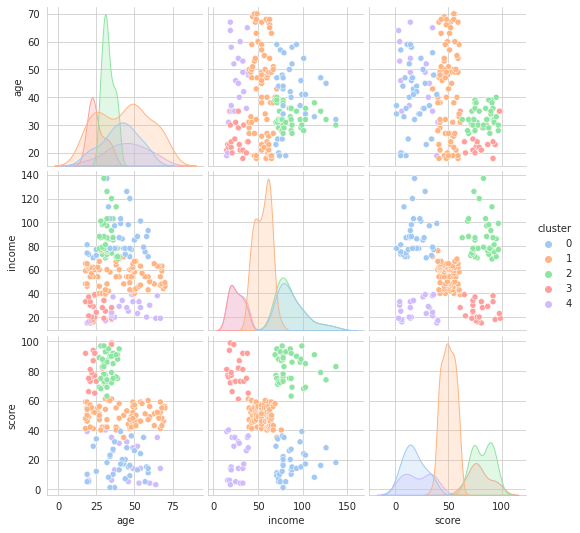

In [15]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=clustered_data, hue='cluster', palette="pastel")

Pode-se também observar a posição dos centróides:

In [16]:
clusters_centers = model.cluster_centers_
clusters_centers = pd.DataFrame(clusters_centers, columns=['age', 'income', 'score'])
clusters_centers.head()

,age,income,score
0,40.666667,87.750000,17.583333
1,42.937500,55.087500,49.712500
2,32.692308,86.538462,82.128205
3,25.272727,25.727273,79.363636
4,45.217391,26.304348,20.913043


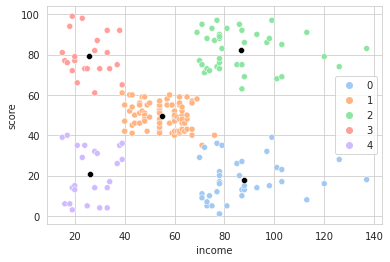

In [17]:
with sns.axes_style('whitegrid'):

  fig, ax = plt.subplots()
  sns.scatterplot(data=clustered_data,   x='income', y='score', hue='cluster', palette="pastel", ax=ax)
  sns.scatterplot(data=clusters_centers, x='income', y='score', color='black', ax=ax)

## 4\. Avaliação

O poder preditivo do modelo de aprendizagem não supervisionada não pode ser avaliado devido a ausência da variável resposta. Contudo, podemos utilizar uma série de métricas que nos ajudam a entender um poucos mais os padrões encontrados, muitas vezes de forma qualitativa.

### **4.1. WCSS** 

Do inglês *within cluster sum of squares* ou soma dos quadrados dentro do cluster, o WCSS mede o quão próximo o centróide $x_c$ de um cluster está dos objectos alocados. O resultado pode ser interpretado com uma medida de proximidade dos objetos agrupados pois se o WCSS é baixo, os objetos estão próximos do centróide e, por consequência, próximos entre si.

O WCSS para o cluster $k$ é definido como:

> $WCSS(x^k,x_c^k) = \sum_{i=1}^{n} (x_i^k-x_c^k)^{2}$

Em geral, treinamos o modelo de agrupamento com diferentes números de clusters e escolhemos a configuração com o WCSS médio para buscar uma boa generalização, essa abordagem é conhecida como **método do cotovelo** (*elbow method*).

In [18]:
wcss = []

for k in range(1, 11):

  model = KMeans(n_clusters=k)
  model = model.fit(data)
  wcss.append(model.inertia_)

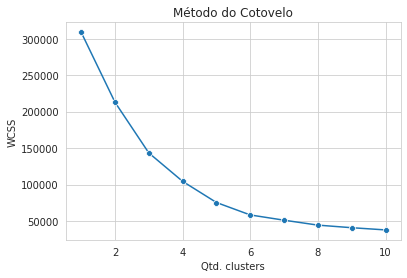

In [19]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(x=range(1, 11), y=wcss, marker="8", palette="pastel")
  grafico.set(title='Método do Cotovelo', ylabel='WCSS', xlabel='Qtd. clusters');

 - **4 clusters**

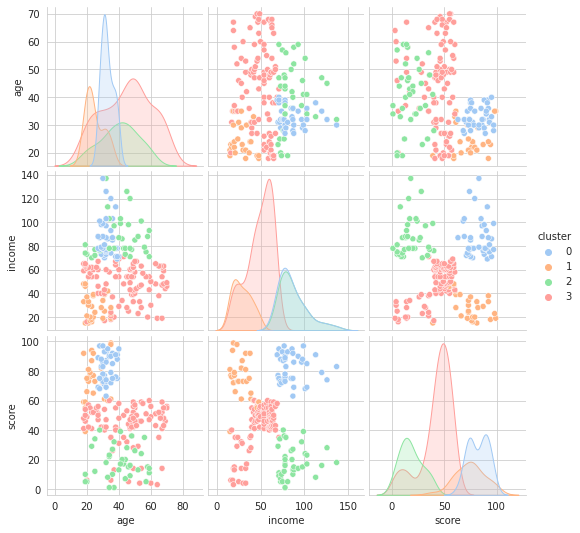

In [20]:
model = KMeans(n_clusters=4)
model = model.fit(data)

clusters = model.labels_
clustered_data = pd.concat([data, pd.DataFrame(clusters, columns=['cluster'])], axis=1)

with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=clustered_data, hue='cluster', palette="pastel")

 - **6 clusters**

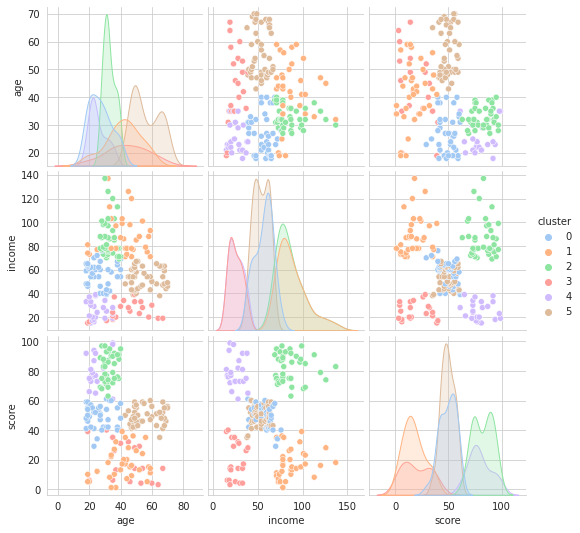

In [23]:
model = KMeans(n_clusters=6)
model = model.fit(data)

clusters = model.labels_
clustered_data = pd.concat([data, pd.DataFrame(clusters, columns=['cluster'])], axis=1)

with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=clustered_data, hue='cluster', palette="pastel")

 - **5 clusters**

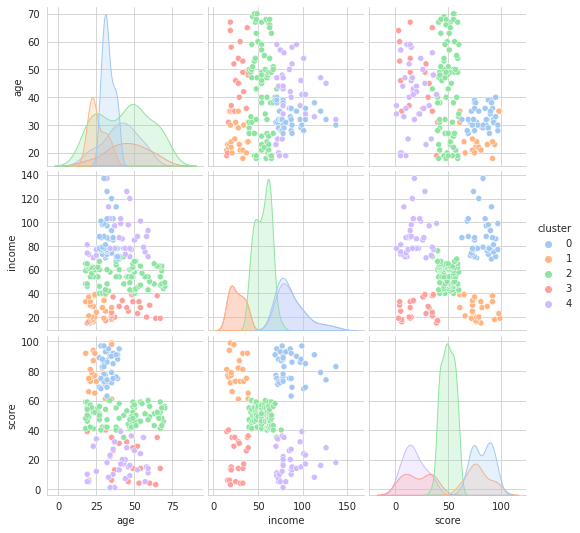

In [22]:
model = KMeans(n_clusters=5)
model = model.fit(data)

clusters = model.labels_
clustered_data = pd.concat([data, pd.DataFrame(clusters, columns=['cluster'])], axis=1)

with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=clustered_data, hue='cluster', palette="pastel")

## 5\. Predição

Com o modelo treinado, avaliado e selecionado, podemos utiliza-lo para resolver os problemas reais que motivaram sua construção.

> **Atenção**: O número atribuído a cada cluster no momento do treino é aleatório, pode ser que você precise ajustar os números para as análises abaixo

### **5.1. Estudo dos clusters** 

Para direcionar as ações de marketing, precisamos entender melhor o perfil dos clientes dos clusters de interesse através de técnicas de analise exploratória de dados (EDA). Exemplo:

 - **Cluster 1**

São clientes de alta renda e baixo potencial de compras. Poderiam estar gastando mais no shopping.

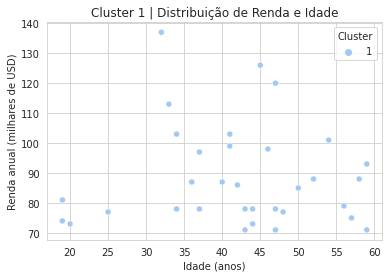

In [28]:
with sns.axes_style('whitegrid'):

  grafico = sns.scatterplot(data=clustered_data.query('cluster == 1'), x="age", y="income", hue="cluster", palette="pastel")
  grafico.set(title='Cluster 1 | Distribuição de Renda e Idade', xlabel='Idade (anos)', ylabel='Renda anual (milhares de USD)');
  grafico.get_legend().set_title("Cluster");

**Conclusão:** Focar esforços de marketing para um público acima de 35 anos.

 - **Cluster 0 e 5**

São cliente com renda e potencial de compras médio. Podem deixar de frequentar o shopping.

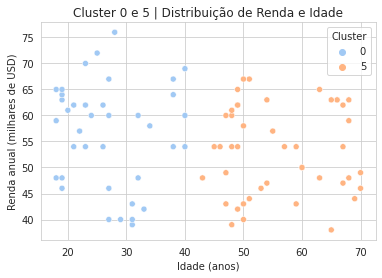

In [29]:
with sns.axes_style('whitegrid'):

  grafico = sns.scatterplot(data=clustered_data.query('cluster == 0 or cluster == 5'), x="age", y="income", hue="cluster", palette="pastel")
  grafico.set(title='Cluster 0 e 5 | Distribuição de Renda e Idade', xlabel='Idade (anos)', ylabel='Renda anual (milhares de USD)');
  grafico.get_legend().set_title("Cluster");

**Conclusão:** Dividir esforços entre dois públicos: abaixo e acima de 40 anos.

### **5.2. Predição** 

 - **Exemplo**: Um cliente com 19 anos, 15.000 USD de renda anual e potencial de compra de 39:


In [30]:
cliente = np.array([19, 15, 39])

In [31]:
cluster = model.predict(cliente.reshape(1, -1))
print(cluster)

[3]


Conclui-se então que o cliente pertence ao cluster **3** de baixa renda, idade e potencial de compra.